In [1]:
import numpy as np
import pandas as pd
import statistics as stt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Dataset/framingham.csv')

In [37]:
data.head(20)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
data.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [5]:
data.shape

(4238, 16)

In [6]:
#Importing the dataset and dropping the unwanted columns 

data.drop(['education'],axis=1,inplace=True)
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
data.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
#Counting the missing values and dropping them
count=0
for i in data.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(data.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

data.dropna(axis=0,inplace=True)

data.describe()

Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.445185,49.578821,0.488397,9.005335,0.030408,0.005601,0.311816,0.027207,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169,0.152574
std,0.497053,8.569322,0.499932,11.922440,0.171730,0.074643,0.463297,0.162709,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039,0.359624
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

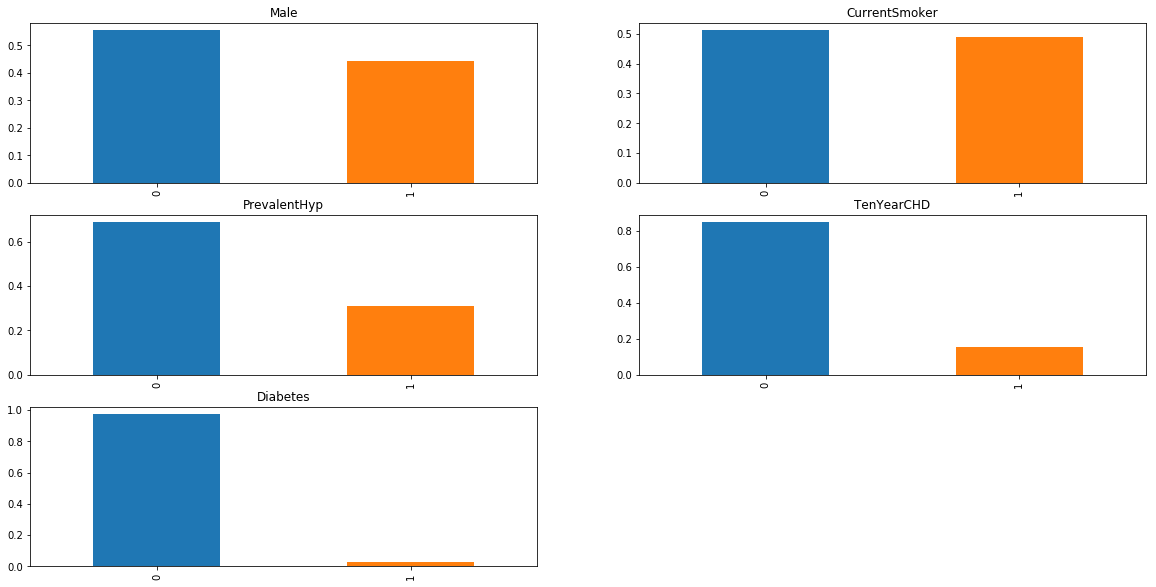

In [10]:
plt.figure(1)
plt.subplot(321)
data['male'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Male')



plt.subplot(323)
data['prevalentHyp'].value_counts(normalize=True).plot.bar(title= 'PrevalentHyp')

plt.subplot(324)
data['TenYearCHD'].value_counts(normalize=True).plot.bar(title= 'TenYearCHD')

plt.subplot(325)
data['diabetes'].value_counts(normalize=True).plot.bar(title= 'Diabetes')

plt.subplot(322)
data['currentSmoker'].value_counts(normalize=True).plot.bar(title= 'CurrentSmoker')


In [11]:
#show features represented in the train dataset
for column in data.columns:
    print(column)

male
age
currentSmoker
cigsPerDay
BPMeds
prevalentStroke
prevalentHyp
diabetes
totChol
sysBP
diaBP
BMI
heartRate
glucose
TenYearCHD


In [12]:
# Print data types for each variable
data.dtypes 

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [16]:
# Frequency table of a variable will give us the count of each category in that variable.
data['male'].value_counts() 

0    2080
1    1669
Name: male, dtype: int64

In [25]:
data['male'].value_counts(normalize=True)

0    0.554815
1    0.445185
Name: male, dtype: float64

In [17]:
data['prevalentHyp'].value_counts()

0    2580
1    1169
Name: prevalentHyp, dtype: int64

In [24]:
data['prevalentHyp'].value_counts(normalize=True)

0    0.688184
1    0.311816
Name: prevalentHyp, dtype: float64

In [18]:
data['diabetes'].value_counts()

0    3647
1     102
Name: diabetes, dtype: int64

In [23]:
data['diabetes'].value_counts(normalize=True)

0    0.972793
1    0.027207
Name: diabetes, dtype: float64

In [19]:
data['currentSmoker'].value_counts()

0    1918
1    1831
Name: currentSmoker, dtype: int64

In [22]:
data['currentSmoker'].value_counts(normalize=True)

0    0.511603
1    0.488397
Name: currentSmoker, dtype: float64

In [20]:
data['TenYearCHD'].value_counts()

0    3177
1     572
Name: TenYearCHD, dtype: int64

In [21]:
data['TenYearCHD'].value_counts(normalize=True)

0    0.847426
1    0.152574
Name: TenYearCHD, dtype: float64

C:\Users\Adam_adinani 15\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


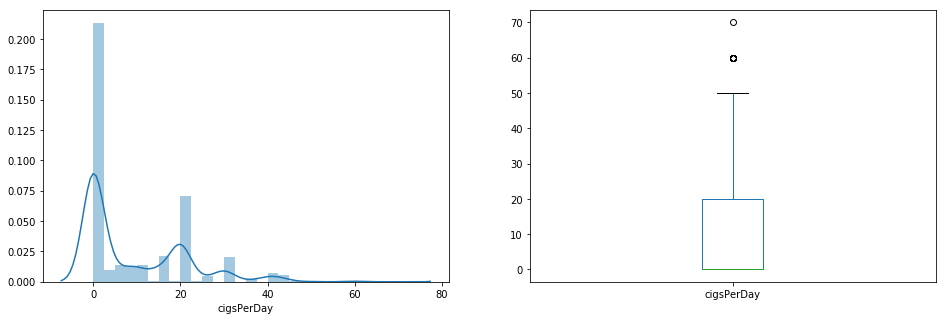

In [26]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['cigsPerDay']);

plt.subplot(122)
data['cigsPerDay'].plot.box(figsize=(16,5))

plt.show()

C:\Users\Adam_adinani 15\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


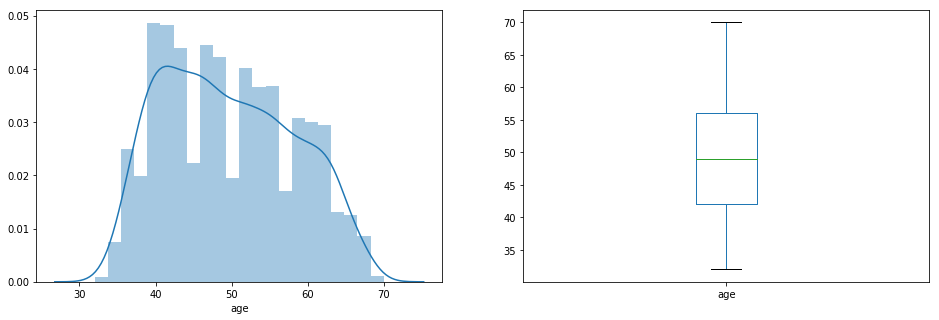

In [27]:
plt.figure(1)
plt.subplot(121)
df=data.dropna()
sns.distplot(df['age']);

plt.subplot(122)
data['age'].plot.box(figsize=(16,5))

plt.show()

C:\Users\Adam_adinani 15\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


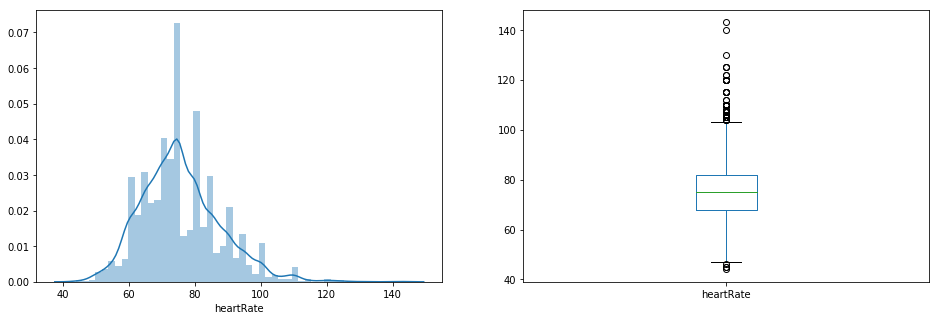

In [28]:
plt.figure(1)
plt.subplot(121)
df=data.dropna()
sns.distplot(df['heartRate']);

plt.subplot(122)
data['heartRate'].plot.box(figsize=(16,5))

plt.show()

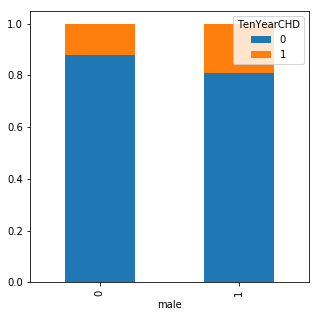

In [32]:
male= pd.crosstab(data['male'],data['TenYearCHD'])
male.div(male.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(5,5)) 

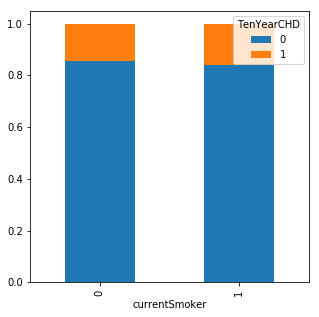

In [33]:
currentSmoker= pd.crosstab(data['currentSmoker'],data['TenYearCHD'])
currentSmoker.div(currentSmoker.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(5,5)) 

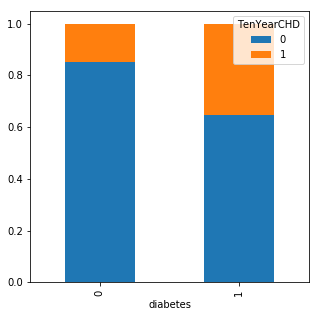

In [35]:
Diabetes= pd.crosstab(data['diabetes'],data['TenYearCHD'])
Diabetes.div(Diabetes.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(5,5))

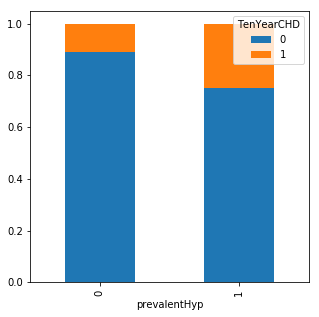

In [38]:
prevalentHyp= pd.crosstab(data['prevalentHyp'],data['TenYearCHD'])
prevalentHyp.div(prevalentHyp.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(5,5))

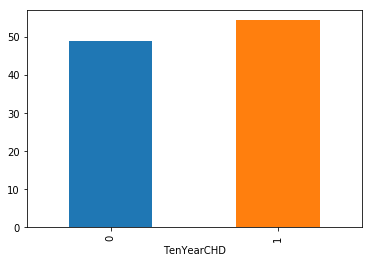

In [39]:
data.groupby('TenYearCHD')['age'].mean().plot.bar()

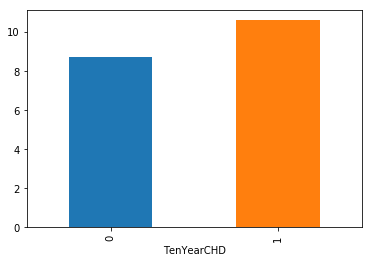

In [40]:
data.groupby('TenYearCHD')['cigsPerDay'].mean().plot.bar()

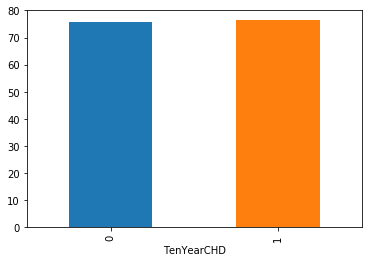

In [41]:
data.groupby('TenYearCHD')['heartRate'].mean().plot.bar()

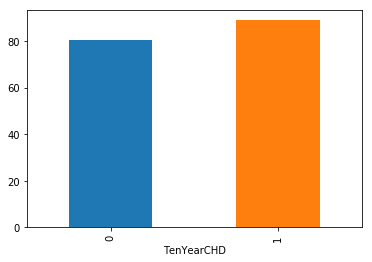

In [42]:
data.groupby('TenYearCHD')['glucose'].mean().plot.bar()

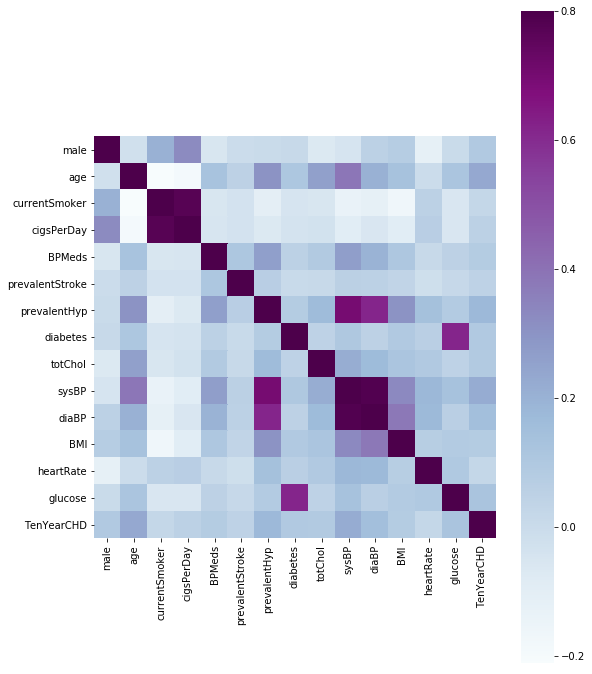

In [44]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(9, 12)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

In [46]:
X = data.drop('TenYearCHD',axis = 1)
y = data.TenYearCHD

In [47]:
from sklearn.model_selection import train_test_split 
x_train, x_val, y_train, y_val = train_test_split(X,y, test_size =0.2, random_state =42)

In [48]:
from sklearn import neighbors 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve 

In [49]:
#create different KNeigbhborsClassifier with different number of neighbors 
knn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
knn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn7 = neighbors.KNeighborsClassifier(n_neighbors=7)

#train the model
knn1.fit(x_train,y_train) 
knn3.fit(x_train,y_train) 
knn5.fit(x_train,y_train) 
knn7.fit(x_train,y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [50]:
knn1_preds = knn1.predict(x_val) 
knn3_preds = knn3.predict(x_val) 
knn5_preds = knn5.predict(x_val) 
knn7_preds = knn7.predict(x_val) 

In [51]:
print("{} - score = {}".format("knn1",accuracy_score(y_val,knn1_preds)))
print("{} - score = {}".format("knn3",accuracy_score(y_val,knn3_preds)))
print("{} - score = {}".format("knn5",accuracy_score(y_val,knn5_preds)))
print("{} - score = {}".format("knn7",accuracy_score(y_val,knn7_preds)))

knn1 - score = 0.7746666666666666
knn3 - score = 0.8106666666666666
knn5 - score = 0.8266666666666667
knn7 - score = 0.8333333333333334


In [66]:
#create different KNeigbhborsClassifier with different number of neighbors 
knn1 = neighbors.KNeighborsClassifier(n_neighbors=9)
knn3 = neighbors.KNeighborsClassifier(n_neighbors=13)
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn7 = neighbors.KNeighborsClassifier(n_neighbors=21)

#train the model
knn1.fit(x_train,y_train) 
knn3.fit(x_train,y_train) 
knn5.fit(x_train,y_train) 
knn7.fit(x_train,y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

In [53]:
knn1_preds = knn1.predict(x_val) 
knn3_preds = knn3.predict(x_val) 
knn5_preds = knn5.predict(x_val) 
knn7_preds = knn7.predict(x_val) 

In [54]:
print("{} - score = {}".format("knn1",accuracy_score(y_val,knn1_preds)))
print("{} - score = {}".format("knn3",accuracy_score(y_val,knn3_preds)))
print("{} - score = {}".format("knn5",accuracy_score(y_val,knn5_preds)))
print("{} - score = {}".format("knn7",accuracy_score(y_val,knn7_preds)))

knn1 - score = 0.8413333333333334
knn3 - score = 0.844
knn5 - score = 0.8266666666666667
knn7 - score = 0.8426666666666667


In [55]:
confusion_matrix(y_val,knn3_preds)

array([[626,   4],
       [113,   7]], dtype=int64)

In [56]:
import itertools 

# A function to draw confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, fig_num=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if fig_num is not None:
        plt.subplot(2,2,fig_num)
    fmt =   'd'
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    plt.title("")

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
         plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



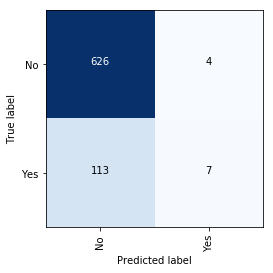

In [57]:
# Plot non-normalized confusion matrix
class_names  = ["No",'Yes']
plot_confusion_matrix(y_val, knn3_preds, classes=class_names,
                      title='Confusion matrix for Logistric Regression Model')

In [58]:
f1_score(y_val,knn3_preds)

0.1068702290076336

In [59]:
roc_auc_score(y_val, knn3_preds)

0.5259920634920635

Text(0.5,1,'ROC Curve for the Logistic Regression Model')

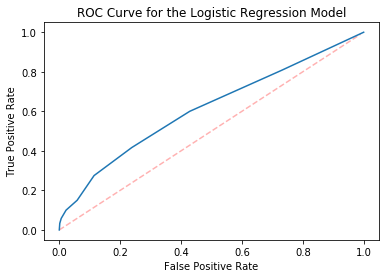

In [60]:
#ROC curve on the val set

# keep probabilities for the positive outcome only
y_proba = knn3.predict_proba(x_val)[:,1]

fpr, tpr, thresholds = roc_curve(np.array(y_val) , y_proba)

x=np.arange(0,100)/100
plt.plot(x,x,'--',color="red",alpha=0.3)
plt.plot(fpr,tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve for the Logistic Regression Model")

In [61]:
fpr

array([0.        , 0.0015873 , 0.00634921, 0.02222222, 0.05873016,
       0.11428571, 0.23809524, 0.42857143, 0.73174603, 1.        ])

In [62]:
tpr 

array([0.        , 0.03333333, 0.05833333, 0.1       , 0.15      ,
       0.275     , 0.41666667, 0.6       , 0.80833333, 1.        ])

In [64]:
# save the model in the models directory 
from sklearn.externals import joblib

filename = "Project model/KNN_model.pkl"

joblib.dump(knn3, filename)

['Project model/KNN_model.pkl']